Анастасия Плавина

### Тема: Описательная статистика, повтороение формулы Байеса

#### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns

x = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]
n = len(x)

x_avg = sum(x) / n

deviation = 0
for i in x:
    deviation += (i-x_avg)**2

d =  deviation / n
d_unb = deviation / (n-1)

sigma = d**(1/2)
sigma_unb = d_unb**(1/2)

print(f'Среднее значение выборки: {x_avg}')
print(f'Cмещенная оценка дисперсии: {d}')
print(f'Несмещенная оценка дисперсии: {d_unb}') 
print(f'Среднее квадратичное отклонение по смещенной дисперсии: {sigma}') 
print(f'Среднее квадратичное отклонение по несмещенной дисперсии: {sigma_unb}') 

Среднее значение выборки: 73.14285714285714
Cмещенная оценка дисперсии: 2135.074829931973
Несмещенная оценка дисперсии: 2241.8285714285716
Среднее квадратичное отклонение по смещенной дисперсии: 46.20686994302874
Среднее квадратичное отклонение по несмещенной дисперсии: 47.34795213553139


In [185]:
# проверка
x_avg_np = np.mean(x)
d_np = np.var(x)
sigma_np =  np.std(x)

x_series = pd.Series(x)
x_avg_pd = x_series.mean()
d_pd = x_series.var()
sigma_pd = x_series.std()

(x_avg, x_avg_np, x_avg_pd), (d_unb, d_pd), (d, d_np), (sigma, sigma_np), (sigma_unb, sigma_pd)

((73.14285714285714, 73.14285714285714, 73.14285714285714),
 (2241.8285714285716, 2241.828571428571),
 (2135.074829931973, 2135.0748299319725),
 (46.20686994302874, 46.206869943028735),
 (47.34795213553139, 47.347952135531386))

#### Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [186]:
def quantile(x, a):
    x.sort()
    n = len(x)
    idx = n*a
    if idx - int(idx) > 0:
        q = x[int(idx)]
    else:
        q = sum(x[int(idx)-1:int(idx)+1]) / 2
    
    return q

median = quantile(x, 0.5)
q1 = quantile(x, 0.25)
q3 = quantile(x, 0.75)
iqr = q3-q1

print(f'Медиана = {median}\nQ1 = {q1}\nQ3 = {q3}\nIQR = {iqr}')

Медиана = 70
Q1 = 45
Q3 = 84
IQR = 39


In [187]:
# проверка
x_series.quantile([0.25, 0.5, 0.75])

0.25    45.0
0.50    70.0
0.75    84.0
dtype: float64

In [192]:
outliers = x_series[x_series < (q1 - 1.5 * iqr)], x_series[x_series > (q3 + 1.5 * iqr)]
outliers

(Series([], dtype: int64),
 11    230
 20    150
 dtype: int64)

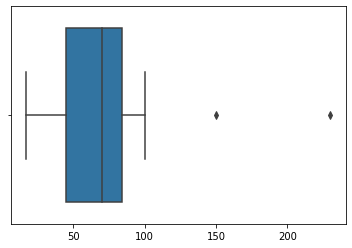

In [193]:
sns.boxplot(x)

#### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение

$P(A) + P(B) = P(C)$ => $P(A) = P(B) = 0.25$, a $P(C) = 0.5$ - вероятность быть студентом соответствующего факультета

$P(S|A)= 0.8$ - вероятность сдать сессию, если ты студент факультета А 

$Р(S)$ - вероятность сдать сессию для всех факультетов

$P(A|S)$ - вероятность быть студентом факультета А, если сдал сессию

По формуле Байеса:
### $P(A|S) = \frac{P(S|A) \cdot P(A)}{P(S)}$


По формуле полной вероятности:
$P(S) = P(S|A) \cdot P(A) + P(S|B) \cdot P(B) + P(S|C) \cdot P(C)= 0.8 \cdot 0.25 + 0.7 \cdot 0.25 + 0.9 \cdot 0.5 = 0.825$

$P(A|S) = \frac{0.8 \cdot 0.25}{0.825} \approx 0.24$

$P(B|S) = \frac{0.7 \cdot 0.25}{0.825} \approx 0.21$

$P(C|S) = \frac{0.9 \cdot 0.5}{0.825} \approx 0.55$

In [203]:
p_a = 0.25
p_b = p_a
p_c = p_a + p_b
p_sa = 0.8
p_sb = 0.7
p_sc = 0.9

p_s = p_sa*p_a + p_sb*p_b + p_sc*p_c
p_s

0.825

In [204]:
p_sa*p_a / p_s

0.24242424242424246

In [199]:
p_sb*p_b / p_s

0.21212121212121213

In [205]:
p_sc*p_c / p_s

0.5454545454545455